# bloc

## concept programming notepad

Concept programming here does not mean the term by Alexsandr Stepanov here: https://en.wikipedia.org/wiki/Concept_(generic_programming)

CP is a programming model described in the works of Enn Heraldovich Tyugu about model-based software development. The common idea is about making domain models described the problem in a wide in form of relation networks, and automatic program code synthesis from specifications, which works over these networks to solve concrete tasks.

* http://www.cs.ioc.ee/~tyugu/
* [Концептуальное программирование](https://ru.wikipedia.org/wiki/%D0%9A%D0%BE%D0%BD%D1%86%D0%B5%D0%BF%D1%82%D1%83%D0%B0%D0%BB%D1%8C%D0%BD%D0%BE%D0%B5_%D0%BF%D1%80%D0%BE%D0%B3%D1%80%D0%B0%D0%BC%D0%BC%D0%B8%D1%80%D0%BE%D0%B2%D0%B0%D0%BD%D0%B8%D0%B5)


* J. Symbolic Computation (1988) 5, 359-375\
**The Programming System PRIZ**\
G.Mints, E.Tyugu,\
Institute of Cybernetics, Estonian Academy of Sciences,Tallinn
200108, USSR\
[pdf](https://www.academia.edu/18315153/The_programming_system_PRIZ?auto=download)
* Э.Х. Тыугу **Концептуальное программирование**. М.: Наука, 1984. 255 с

```
TO: tyugu@ieee.org
```

> I'm interested in experimenting with mixing your CP approach and Marvin Minsky frame model for commercial, 
> mobile, and embedded software & hardware (IoT) systems development. The site has a lot of materials and links on 
> the theme, but I'd like to track discussions of people involved in current works on concept programming.


In this working bloc (as [c]oding [blo]g) you can find a lot of concrete applications of CP methodology interleaved with huge amount of thinking about all projects I worked on from the end of 2019 as a freelancer and **legacy raker** (*).

### legacy \[code\]raker

I introduce the new programming-related profession: the **legacy \[code\]raker**: a specially dedicated specialist which has a target of old software projects reborning and support.

## metaL: \[meta\]programming \[L\]anguage and Marvin Minsky frame model

The core of my CP system is a homoiconic model uses directed graphs of objects as both program and data representation. The idea was inherited from Marvin Minsky's book: Frames for data representation, which I extended with the ability to store not only slots (attributes) but also hold any frames in an ordered container.

In [33]:
%%writefile metaL.py

import os,sys
from graphviz import Digraph

Overwriting metaL.py


In [34]:
%%writefile -a metaL.py

class Frame:
    def __init__(self,V):
        # type/class tag
        # this field is required for literal parsing by PLY library 
        self.type = self.__class__.__name__.lower()
        # scalar data value in implementation language type
        # mostly names the frame, but also can store things like numbers and strings
        self.val  = V
        # slots = attributes = string-keyed associative array
        self.slot = {}
        # ordered storage = AST nested elemens = vector = stack = queue
        self.nest = []

Appending to metaL.py


The presence of an ordered collection is definitively required for representing any program source code, as this is very close to classical attribute grammar -- attributed trees and graphs. The object graph (frame) representation of a program as a primary form is much more effective and native for any work involved with source code transformations: synthesis, modifications, analysis, cross-language translation, etc.

Factically, we don't need any text programming languages at all, as these objects graphs I call **Executable Data Structure** can 
* hold any program statically (on storage), 
* can be executed by a **model EDS-interpreter**, 
* translated into any mainstream languages, and 
* \[cross-\]compiled into machine code.

In [35]:
%%writefile -a metaL.py

# class Frame:

    # dump and plot
    
    # callback for print
    def __repr__(self):
        return self.dump()
    # full tree-form dump
    def dump(self,depth=0,prefix='',voc=True,stack=True,test=False):
        # subtree header
        tree = self._pad(depth) + self.head(prefix=prefix,test=test)
        # infty recursion block
        if not depth: Frame._dumped = []
        if self in Frame._dumped: return tree + ' _/'
        else: Frame._dumped.append(self)
        # slots
        if voc:
            for i in self.slot:
                tree += self.slot[i].dump(depth+1,prefix='%s = '%i,test=test)
        # nested as subtrees
        if stack:
            for j in self.nest:
                tree += j.dump(depth+1,test=test)
        # resulting subtree
        return tree
    # short-form dump: <T:V> header only
    def head(self,prefix='',test=False):
        header = '%s<%s:%s>' % (prefix,self.type,self._val())
        if not test: header += ' @%x' % id(self)
        return header
    # pad tree with tabs with given depth
    def _pad(self,depth):
        return '\n' + '\t' * depth
    # .val can be non-string and must be overloaded in some frame classes
    def _val(self):
        return '%s' % self.val

Appending to metaL.py


In [36]:
%%writefile -a metaL.py

# class Frame:

    # operators
    
    # A[key]
    def __getitem__(self,key):
        return self.slot[key]
    # A[key] = B
    def __setitem__(self,key,that):
        self.slot[key] = that ; return self
    # A << B --> A[B.val] = B
    def __lshift__(self,that):
        self[that.val] = that ; return self
    # A // B
    def __floordiv__(self,that):
        self.nest.append(that) ; return self


Appending to metaL.py


## pytest

I prefer to use `pytest` unit testing framework: it is simple and light.

* https://www.guru99.com/pytest-tutorial.html
* (ru) https://medium.com/@dmrlx/%D0%B2%D0%B2%D0%B5%D0%B4%D0%B5%D0%BD%D0%B8%D0%B5-%D0%B2-pytest-cc6175c7d0dc

In [37]:
%%writefile -a metaL.py

# class Frame:

    # method returns simplified tree dump for py.tests
    def test(self):
        return self.dump(test=True)

Appending to metaL.py


This method provides simplified dump to compare it with constant string in tests.

In [38]:
from metaL import *

In [39]:
# demo / tests for core Frame

print( Frame('Hello') // Frame('World') << Frame('slot') )


<frame:Hello> @7f32d0da1be0
	slot = <frame:slot> @7f32d1605160
	<frame:World> @7f32d0da1c18


It is not good to use the sample code as above to show how some software library works. The widely adopted method, which is required to write any production software is testing. Tests also show every feature of a library, how to use it, how not to use it, what preparations must be done, and what input formats are needed.

In [45]:
%%writefile test_metaL.py

import pytest

from metaL import *

def test_hello():
    assert (
        Frame('Hello') // Frame('World') << Frame('slot') ).test() == \
        '\n<frame:Hello>\n\tslot = <frame:slot>\n\t<frame:World>'


Overwriting test_metaL.py


In [46]:
!py.test -v test_metaL.py

============================= test session starts ==============================
platform linux -- Python 3.5.3, pytest-5.2.1, py-1.8.0, pluggy-0.13.0 -- /home/dpon/bloc/bin/python3
cachedir: .pytest_cache
rootdir: /home/dpon/bloc
collected 1 item                                                               

test_metaL.py::test_hello PASSED                                         [100%]

============================== 1 passed in 0.10s ===============================


## Why Python? What about the technology stack

### Python

Python is **great for prototyping** software systems:

* easy to learn and use programming language, 
* available on many systems including embedded (https://micropython.org/), 
* has a huge amount of ready to use libraries (batteries included).
* does not need complex installations (`python3 -m venv .` is not complex)
* very light in run from scratch (no JVM heat up)

### Nim

* https://nim-lang.org/
* https://forum.nim-lang.org/

Nim got a first 1.0 release less then month ago, so it is not good for enterpreise programming.
* https://forum.nim-lang.org/t/5347

But I'm going to use it especially for this role:
* there is no any heavy runtime (JVM/CLR, huge gigabytes of standard libraries)
* extra portable (Win/Mac/Linux, Android NDK, MIPS/ARM embedded)
* very fast compiling
* tight integration with C/C++ -- it uses C compiler as a backend, and **tranlate**s .nim for .c
  * there are no any problems to fastly write C interfacing code to use any C(++) libraries

It looks for me as a technology very interesting for the small business market, where there are no resources to rent or invest in hardware and expensive software for huge processing with Java hell etc. I don't speak about the full replacement of Java (yet?), but the ability to work both standalone and in symbiosis with existing systems.

What features of Nim look target-yummy:

* **portability**: software already able to work on any meaningful hardware platforms
* compactness and **extra low resource requirements**: there is no any xVM and giant runtime required even to run the HelloWorld, you can run a simple accounting system which will eat a few megabytes of RAM only
* **metaprogramming**: there is a huge amount of repeating code and design patterns in business software, meta is able to simplify and automate some repeating snippets

PS: Maybe someone can advise me on some good manuals and tutorials on enterprise development patterns and business software architecture?

#### What is the future of the Nim programming language now?

https://www.quora.com/What-is-the-future-of-the-Nim-programming-language-now/answer/Dmitry-Ponyatov

Nim looks very attractive for Python programmers who want to push their software system prototypes into production. Python not so good for use as a platform for high-load applications, and does not have any good use on mobile devices (Android etc) as it is too slow, too resource-hungry, and has a lot of problems with system-level integration.

While Nim has semantics close to Python, it is portable for a lot of platforms, has no notable resource consumptions for runtime, and has tight and easy integration with any C(++) frameworks, libraries, and system API.

**Nim is not mature now, but** bundled with a Python as a production-stage platform **it has a very good perspective to kickass even the Java in part of enterprise applications** (small business solutions where *consumers have no enough money to own high-price JRE infrastructure*).

### Java / C# / Delphi / C++ legacy code rake and integration

Suddenly, there is no way to avoid mainstream languages and their framework/library stacks. There is a huge amount of working code deployed anywhere and runs dozens of years in production (so we got the new IT profession -- coderaker (c). There are areas where we can't use any other stack then already installed: finance, banking, security, medical systems and embedded (ANSI C only, especially MISRA-certified critical applications, and conservator-ill persuasions).

You must know and use all of them, especially if you want to earn money or want to professionally dive into legacy software reborning. Any system you use, as we speak about *concept programming*, must be language-agnostic. As **you write CP system port yourself** making it the way **you need**, it works the same *until we stay at the imperative programming paradigm*. Oops, note that *CP is declarative programming in a big part* -- you define your programming (and hardware design) knowledge database, which holds concepts defined in a declarative way.

### Concept programming is a layer of cross-translation

When you go into contract development, your CP system must provide cross-language and cross-system translation of a legacy system logic.

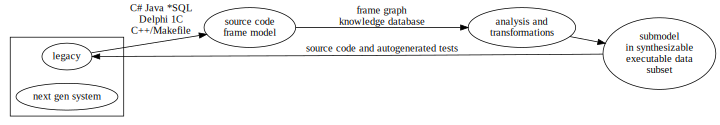

In [42]:
#from graphviz import Digraph
dot = Digraph() ; dot.attr(rankdir='LR',size='10,5')
with dot.subgraph(name='cluster_0') as dotc:
    dotc.node('l','legacy')
    dotc.node('x','next gen system')
dot.node('f','source code\nframe model')
dot.edge('l','f',label='C# Java *SQL\nDelphi 1C\nC++/Makefile')
dot.node('t','analysis and\ntransformations')
dot.edge('f','t','frame graph\nknowledge database')
dot.node('s','submodel\n in synthesizable\n executable data\n subset')
dot.edge('t','s')
dot.edge('s','l','source code and autogenerated tests')
#dot.edge('s','x')
dot